In [1]:
import pandas as pd
df = pd.read_csv('./data/train.csv').drop(columns=['id'])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [12]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [2]:
# Import necessary libraries
from pycaret.classification import setup, compare_models, create_model, tune_model, plot_model, evaluate_model, finalize_model, predict_model, save_model, load_model

# Configuración del experimento
exp_pc01 = setup(data=df, 
                   target='Target', 
                   session_id=123, 
                   train_size=0.7
                   )

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Target mapping,"Dropout: 0, Enrolled: 1, Graduate: 2"
4,Original data shape,"(76518, 37)"
5,Transformed data shape,"(76518, 37)"
6,Transformed train set shape,"(53562, 37)"
7,Transformed test set shape,"(22956, 37)"
8,Numeric features,36
9,Preprocess,True


In [19]:
# Comparación de modelos
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8293,0.9432,0.8293,0.8288,0.8278,0.7251,0.7265,0.5240
gbc,Gradient Boosting Classifier,0.8267,0.0000,0.8267,0.8259,0.8249,0.7207,0.7223,3.3380
rf,Random Forest Classifier,0.8248,0.9378,0.8248,0.8235,0.8227,0.7174,0.7191,0.8940
et,Extra Trees Classifier,0.8230,0.9363,0.8230,0.8218,0.8206,0.7141,0.7161,1.0500
ada,Ada Boost Classifier,0.8186,0.0000,0.8186,0.8192,0.8172,0.7078,0.7097,0.4620
lda,Linear Discriminant Analysis,0.8042,0.0000,0.8042,0.8089,0.8023,0.6830,0.6873,0.1180
ridge,Ridge Classifier,0.7934,0.0000,0.7934,0.7891,0.7799,0.6565,0.6691,0.0670
lr,Logistic Regression,0.7896,0.0000,0.7896,0.7888,0.7861,0.6589,0.6623,3.1810
qda,Quadratic Discriminant Analysis,0.7713,0.0000,0.7713,0.7618,0.7642,0.6283,0.6307,0.0880
nb,Naive Bayes,0.7661,0.8912,0.7661,0.7599,0.7603,0.6195,0.6225,0.0730


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [ ]:
print(best_clf)

In [15]:
# Creación de un modelo específico
dt = create_model('lightgbm')  

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8346,0.9461,0.8346,0.8345,0.8336,0.7344,0.7354
1,0.8225,0.9418,0.8225,0.8214,0.8208,0.7142,0.7155
2,0.8204,0.9384,0.8204,0.8199,0.8188,0.7106,0.7121
3,0.8413,0.9484,0.8413,0.8418,0.8404,0.7448,0.7462
4,0.8264,0.9437,0.8264,0.8261,0.8252,0.7207,0.7219
5,0.8277,0.9409,0.8277,0.8244,0.8242,0.7212,0.7232
6,0.8282,0.9437,0.8282,0.8284,0.8270,0.7235,0.7249
7,0.8254,0.9418,0.8254,0.8256,0.8240,0.7188,0.7205
8,0.8344,0.9420,0.8344,0.8331,0.8326,0.7332,0.7346


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
# Optimización de hiperparámetros

# Define the parameter grid for Grid Search
param_grid_bayesian = {
    'n_estimators': [ 50 , 100 , 150 ],
    'learning_rate' : [ 0.01 , 0.03, 0.05],
    'max_depth': [5, 7, 10],
    'num_leaves': [100, 130, 150],
    'min_samples_split': [2],
    'scale_pos_weight' : [1, 3]
}

# Perform Bayesian Search
tuned_dt = tune_model(dt, custom_grid=param_grid_bayesian, search_library='scikit-learn', search_algorithm='grid')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8342,0.9454,0.8342,0.8338,0.8332,0.7338,0.7347
1,0.8253,0.9412,0.8253,0.8242,0.8235,0.7186,0.7200
2,0.8202,0.9376,0.8202,0.8196,0.8185,0.7102,0.7117
3,0.8406,0.9478,0.8406,0.8406,0.8392,0.7433,0.7448
4,0.8275,0.9434,0.8275,0.8267,0.8261,0.7225,0.7235
5,0.8294,0.9412,0.8294,0.8257,0.8258,0.7239,0.7258
6,0.8325,0.9440,0.8325,0.8317,0.8308,0.7301,0.7316
7,0.8299,0.9418,0.8299,0.8295,0.8285,0.7262,0.7276
8,0.8342,0.9418,0.8342,0.8326,0.8322,0.7328,0.7341


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


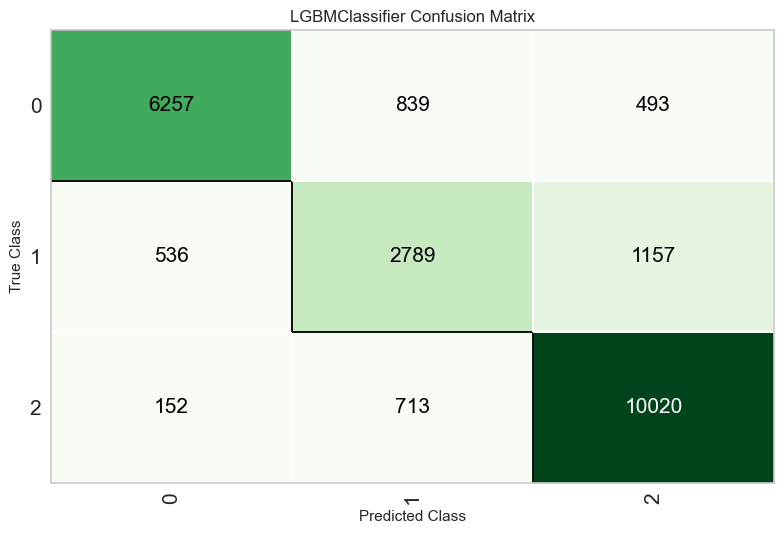

In [22]:
# Visualización del modelo
plot_model(tuned_dt, plot='confusion_matrix')

In [23]:
# Finalizar el modelo
final_dt = finalize_model(tuned_dt)

In [25]:
df_test = pd.read_csv('./data/test.csv')

In [26]:
# Realizar predicciones
predictions = predict_model(final_dt, data=df_test)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split


In [27]:
# Create a DataFrame with 'id' and 'Exited' probabilities
result = pd.DataFrame({
    'id': df_test['id'],
    'Exited': predictions['prediction_score']
})

# Save the result to a CSV file
result.to_csv('./predictions_1.csv', index=False)

In [28]:
# Guardar y cargar modelos
save_model(final_dt, 'final_dt_model_practica1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Marital status',
                                              'Application mode',
                                              'Application order', 'Course',
                                              'Daytime/evening attendance',
                                              'Previous qualification',
                                              'Previous qualification (gra...
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.05, max_depth=10,
                                 min_child_samples=20, min_child_weight=0.001,
                     